In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
Iris = load_iris()

In [4]:
iris_data = pd.DataFrame(Iris.data, columns = Iris.feature_names)

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data['target'] = Iris.target

In [7]:
iris_data.head(
    
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

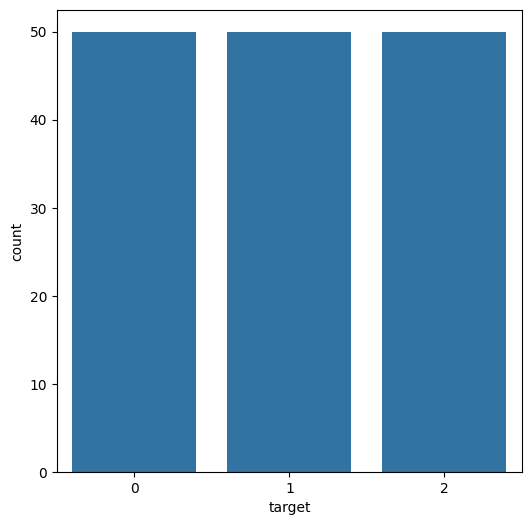

In [10]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'target', data= iris_data)

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
x = iris_data.drop(columns = ['target'])
y = iris_data['target']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [16]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [17]:
print(X_train)

[[ 0.37346331 -0.58519388  0.54075378  0.74234434]
 [-0.9845851   0.54017896 -1.24575071 -0.9938733 ]
 [-0.36729037 -0.36011931 -0.15079635  0.07456832]
 [ 2.22534751  1.66555181  1.63570814  1.27656515]
 [-0.61420826 -0.13504474  0.36786625  0.34167873]
 [-0.12037247  2.11570094 -1.5338966  -1.39453891]
 [ 0.6203812  -0.58519388  1.0017872   1.27656515]
 [ 0.25000437 -0.13504474  0.42549542  0.20812352]
 [-0.49074931 -1.71056672  0.07972036  0.07456832]
 [ 1.23767594  0.09002983  0.71364131  1.41012035]
 [ 0.12654542 -0.36011931  0.36786625  0.34167873]
 [ 0.37346331 -0.36011931  0.25260789  0.07456832]
 [ 1.11421699  0.3151044   1.17467473  1.41012035]
 [-1.10804404 -1.71056672 -0.32368388 -0.32609729]
 [-1.35496194  0.76525353 -1.30337989 -1.39453891]
 [ 0.25000437 -1.03534301  1.0017872   0.20812352]
 [-0.86112615  0.76525353 -1.41863824 -1.39453891]
 [ 0.99075804  0.09002983  0.31023707  0.20812352]
 [-0.9845851   0.9903281  -1.41863824 -1.39453891]
 [-0.86112615  0.9903281  -1.36

In [18]:
model = SVC(kernel = 'linear')

In [19]:
model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
y_predict = model.predict(X_test)

In [22]:
print(x.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [23]:
print(len(y_predict))

30


In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

0.9666666666666667


<Axes: >

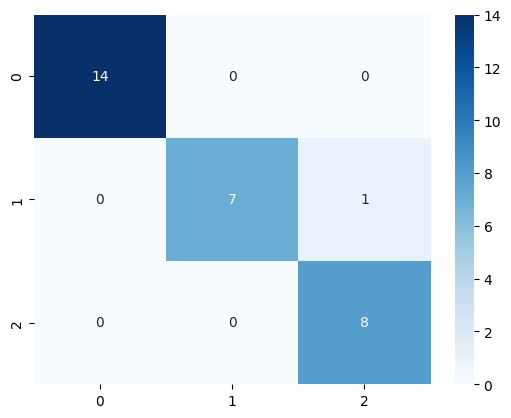

In [26]:
from sklearn.metrics import  confusion_matrix

CM = confusion_matrix(y_test, y_predict)

sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')


In [30]:
test_samples = np.array([
    [5.1, 3.5, 1.4, 0.2], # --- > 0
    [6.0, 2.2, 4.0, 1.0], # --- > 1
    [6.9, 3.1, 5.4, 2.1], # --- > 2
    [5.5, 2.5, 4.0, 1.3], # --- > 1
    [4.8, 3.0, 1.4, 0.1] # --- > 0
    ,])


scaled_array = scaler.transform(test_samples)

Predictions = model.predict(scaled_array)

target_names = Iris.target_names

for i, pred in enumerate(Predictions):
    print(f"Sample {i+1}: The Flower Is '{target_names[pred]}' (class {pred})")

Sample 1: The Flower Is 'setosa' (class 0)
Sample 2: The Flower Is 'versicolor' (class 1)
Sample 3: The Flower Is 'virginica' (class 2)
Sample 4: The Flower Is 'versicolor' (class 1)
Sample 5: The Flower Is 'setosa' (class 0)


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
